In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#create the dataset
np.random.seed(42) #random number won't be generated.

data = {
    'product_id': range(1, 21), #range from 1 to 20
    'product_name': [f'Product_{i}' for i in range(1, 21)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Sports'], size=20),
    'units_sold': np.random.poisson(lam=20, size=20),
    'sales_date': pd.date_range(start='2023-01-01', periods=20, freq='D')
}
sales_data = pd.DataFrame(data) 
print("Sales Data:",sales_data)

Sales Data:     product_id product_name     category  units_sold sales_date
0            1    Product_1         Home          25 2023-01-01
1            2    Product_2       Sports          15 2023-01-02
2            3    Product_3  Electronics          17 2023-01-03
3            4    Product_4         Home          19 2023-01-04
4            5    Product_5         Home          21 2023-01-05
5            6    Product_6       Sports          17 2023-01-06
6            7    Product_7  Electronics          19 2023-01-07
7            8    Product_8  Electronics          16 2023-01-08
8            9    Product_9         Home          21 2023-01-09
9           10   Product_10     Clothing          21 2023-01-10
10          11   Product_11         Home          17 2023-01-11
11          12   Product_12         Home          22 2023-01-12
12          13   Product_13         Home          14 2023-01-13
13          14   Product_14         Home          17 2023-01-14
14          15   Product_15 

In [3]:
#save the dataframe to a CSV file
sales_data.to_csv('sales_data.csv', index=False) #index = False means do not save the index column

In [4]:
#locate the csv file.
import os   #import os library to interact with the operating system
print(os.getcwd()) #getcwd() function returns the current working directory of a process

c:\Users\Acer\AVSCODE\Statistics


In [5]:
#discriptive statistics
desc_stats = sales_data['units_sold'].describe()
print("\nDescriptive Statistics for Units Sold:\n", desc_stats)

mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
std_sales = sales_data['units_sold'].std()
variance_sales = sales_data['units_sold'].var()

#group by category wrt to units sold
category_stats = sales_data.groupby('category')['units_sold'].agg(['mean', 'sum', 'std']).reset_index() #agg() function means avg, is used to apply multiple aggregation operations on the grouped data.

print("\nCategory-wise Sales Statistics:\n", category_stats)
print(f"\nMean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Standard Deviation of Units Sold: {std_sales}")
print(f"Variance of Units Sold: {variance_sales}")



Descriptive Statistics for Units Sold:
 count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Category-wise Sales Statistics:
       category       mean  sum       std
0     Clothing  21.000000   21       NaN
1  Electronics  18.250000   73  2.217356
2         Home  20.111111  181  3.723051
3       Sports  16.833333  101  2.714160

Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Standard Deviation of Units Sold: 3.302311789927586
Variance of Units Sold: 10.905263157894737


In [6]:
#Inferential Statistics
#t-test to compare units sold between two categories
confidence_level = 0.95 #95% confidence level

degees_of_freedom = len(sales_data['units_sold']) - 1 #degrees of freedom for t-test
sample_mean = mean_sales
sample_std_error = std_sales / np.sqrt(len(sales_data['units_sold'])) #standard error

t_score = stats.t.ppf((1 + confidence_level) / 2, degees_of_freedom) #t critical value
margin_of_error = t_score * sample_std_error  

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"\n{int(confidence_level*100)}% Confidence Interval for Mean Units Sold  : {confidence_interval}")


95% Confidence Interval for Mean Units Sold  : (np.float64(17.25447050782354), np.float64(20.34552949217646))


In [7]:
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'], 20)

print("Hypothesis Test Results:")
print("T-Statistic: ",t_statistic, "P-Value: ", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")

Hypothesis Test Results:
T-Statistic:  -1.6250928099424466 P-Value:  0.12061572226781007
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


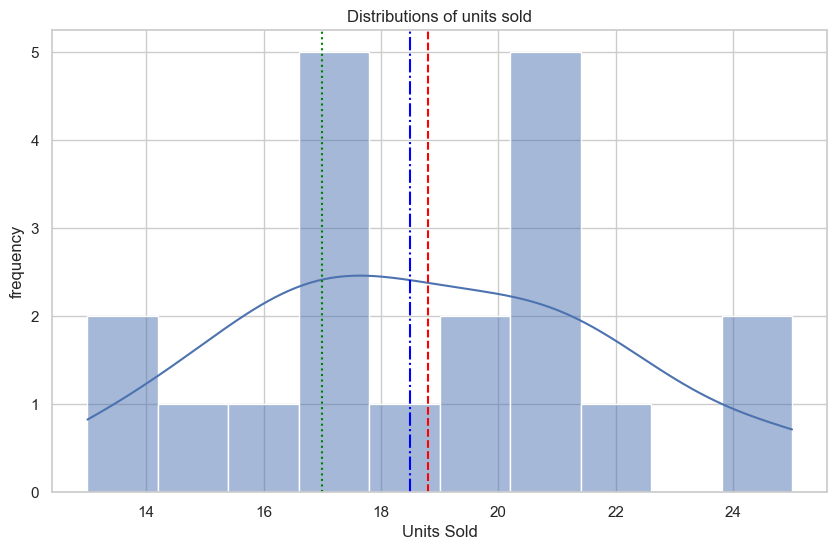

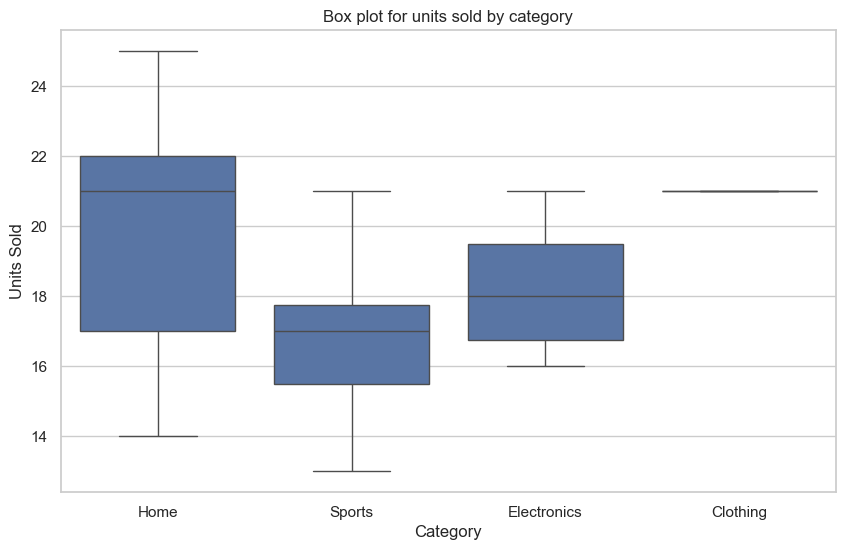

ValueError: cannot insert level_0, already exists

<Figure size 1000x600 with 0 Axes>

In [13]:
#visualization
sns.set(style='whitegrid')

# plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distributions of units sold')
plt.xlabel('Units Sold')
plt.ylabel('frequency')
plt.axvline(mean_sales, color='red', linestyle='--',label='Mean')
plt.axvline(median_sales, color='blue', linestyle='-.',label='Median')
plt.axvline(mode_sales, color='green', linestyle=':',label='Mode')
plt.legend
plt.show()

#boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='units_sold',data=sales_data)
plt.title('Box plot for units sold by category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

#bar plot for the units sold by category
plt.figure(figsize=(10,6))
category_stats = category_stats.reset_index()
sns.barplot(x='category',y='Total units Sold', data=category_stats)
plt.title('Total units sold by category')
plt.xlabel('category')
plt.ylabel('Total units Sold')
plt.show()